# 🐈🐕Dathaton santuario nueva amazonas 🐔🐃

------------ Este proyecto tiene fines educativos ---------------------

El Santuario Nueva Amazonas ha registrado un alarmante incremento de una enfermedad viral letal que afecta a diversas especies. Ante la urgencia de contener su propagación, se nos ha encomendado la tarea de analizar minuciosamente los datos clínicos para identificar patrones en los síntomas. Con esta información, el equipo médico podrá diseñar estrategias precisas para erradicar el virus y, así, preservar la rica diversidad biológica que habita.

Nuestra hipótesis

Los animales que presentan una combinación específica de síntomas tienen una mayor probabilidad de ser clasificados como peligrosos, lo que indica una posible correlación entre ciertos síntomas y la gravedad de la enfermedad viral.



#  Cargar las Bibliotecas y los Datos 📚

In [4]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos en línea
%matplotlib inline

# Cargar los datos en un DataFrame
df = pd.read_csv('animal_condition.csv')
print(df.head()) # Mostrar las primeras filas del DataFrame

  AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  
0  Dehydration       Yes  
1        Pains       Yes  
2     Anorexia       Yes  
3     Sneezing       Yes  
4     Blue Eye       Yes  


In [5]:
df.columns

Index(['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous'],
      dtype='object')

In [6]:
!pip install --upgrade matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


# Exploración Inicial de los Datos 🔎
Aqui vamos a ver la estructura del Dataframe, el resumen estadístico para poder hacer las preguntas disparadoras.


In [7]:
# Mostrar la estructura del DataFrame
print(df.info()) # Obtener información sobre los tipos de datos y la cantidad de valores no nulos
print("="*100)

# Mostrar un resumen estadístico de las variables numéricas
print(df.describe(include= 'all')) # Estadísticas descriptivas de las variables numéricas
print("="*100) #esto es un separador visual

# Revisamos la cantidad de valores nulos en cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB
None
       AnimalName symptoms1 symptoms2 symptoms3    symptoms4 symptoms5  \
count         871       871       871       871          871       871   
unique         46       232       230       229          217       203   
top     Buffaloes     Fever  Diarrhea  Coughing  Weight loss     Pains   
freq          129       257       119        95          117        99   

       Dangerous  
count        869  
unique         2  
top          Yes  
freq         849  

Valores nulos por colum

## PREGUNTAS DISPARADORAS ❓

**¿Qué proporción de casos son considerados peligrosos vs no peligrosos?**

**Cuáles son los síntomas más frecuentes?**

**¿Cuáles son las especies que más sufren estos sintomas?**

**¿Cuáles son las especies que mas sufren el sintoma principal?**

**¿Cúales son las especies que más han fallecido?**

**¿Cúales son el conjunto de síntomas presentados por animales fallecidos?**


# Limpieza de datos 🧼 🧹


Cuando ejecutamos esta linea

```
print(df.info())
```
nos sale el siguiente resultado:

```
 6   Dangerous   869 non-null    object
```
Esta linea nos informa que hay 2 registros con valores ausentes en esa columna. Lo cual debemos depurar con el fin de que los datos sean procesados con éxito.

Pero para asegurarnos podemos emplear el siguiente método:

```
print(df.isnull().sum())
```
El cual nos arroja como resultado:

```
Dangerous     2
```
Decidiremos completarlos con el valor 'No' y convertiremos la columna a una versión numérica para análisis cuantitativo.

In [8]:
# Rellenamos los valores nulos en la columna 'Dangerous' con 'No'
df['Dangerous'] = df['Dangerous'].fillna('No')

# Creamos una columna numérica para Dangerous: Yes -> 1, No -> 0
df['Dangerous_numeric'] = df['Dangerous'].map({'Yes': 1, 'No': 0})

# Revisamos nuevamente los valores únicos
print("\nValores únicos en Dangerous:", df['Dangerous'].unique())




Valores únicos en Dangerous: ['Yes' 'No']


## Priorizamos sintomas mas frecuentes


In [9]:
# Lista de columnas de síntomas
symptom_cols = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']

# Concatenamos las columnas de síntomas en una única serie
symptoms_series = pd.concat([df[col] for col in symptom_cols])

# Eliminamos valores nulos o vacíos
symptoms_series = symptoms_series.dropna()
symptoms_series = symptoms_series[symptoms_series != '']

# Contamos la frecuencia de cada síntoma y lo convertimos a DataFrame
symptom_counts = symptoms_series.value_counts().reset_index()
symptom_counts.columns = ['Síntoma', 'Frecuencia']
print("\nFrecuencia de cada síntoma:")
print(symptom_counts)

# Filtramos para obtener solo los 20 síntomas más frecuentes
symptom_counts_top = symptom_counts.nlargest(20, 'Frecuencia')


Frecuencia de cada síntoma:
                  Síntoma  Frecuencia
0                   Fever         261
1             Weight loss         153
2                Diarrhea         145
3                Coughing         105
4                   Pains          99
..                    ...         ...
930           Radip onset           1
931           Head Shking           1
932         Inflammation            1
933  Isolation from flock           1
934          Head tossing           1

[935 rows x 2 columns]


# Visualización de Datos 📊


## Proporción de casos peligrosos vs no peligrosos 💀
Se cuenta la cantidad de registros para cada clase de Dangerous y se visualiza con un gráfico de pastel ya que son datos que contrastan.
Esta gráfica informa el rango de casos clínicos registrados como peligrosos ya que el riesgo tasa de mortalidad es elevada.


Conteo de casos peligrosos vs no peligrosos:
Dangerous
Yes    849
No      22
Name: count, dtype: int64


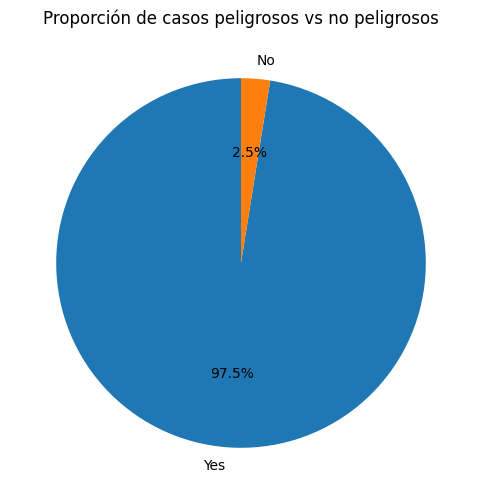

In [10]:
# Conteo de casos por Dangerous
dangerous_counts = df['Dangerous'].value_counts()
print("\nConteo de casos peligrosos vs no peligrosos:")
print(dangerous_counts)

plt.figure(figsize=(6,6))
plt.pie(dangerous_counts, labels=dangerous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de casos peligrosos vs no peligrosos')
plt.show()


## Análisis de los síntomas 🔬
 ¿Cuáles son los síntomas más frecuentes?
Los síntomas se encuentran en las columnas symptoms1 - symptoms5. Así que unimos estos datos en una sola serie para contar su frecuencia.
Usaremos un gráfico de barras (ya que nos permiten mostrar los rangos de valores de forma sencila) y el conteo.

Esto ayuda a los veterinarios a estar alerta y actuar de manera rápida cuando estos aparezcan.

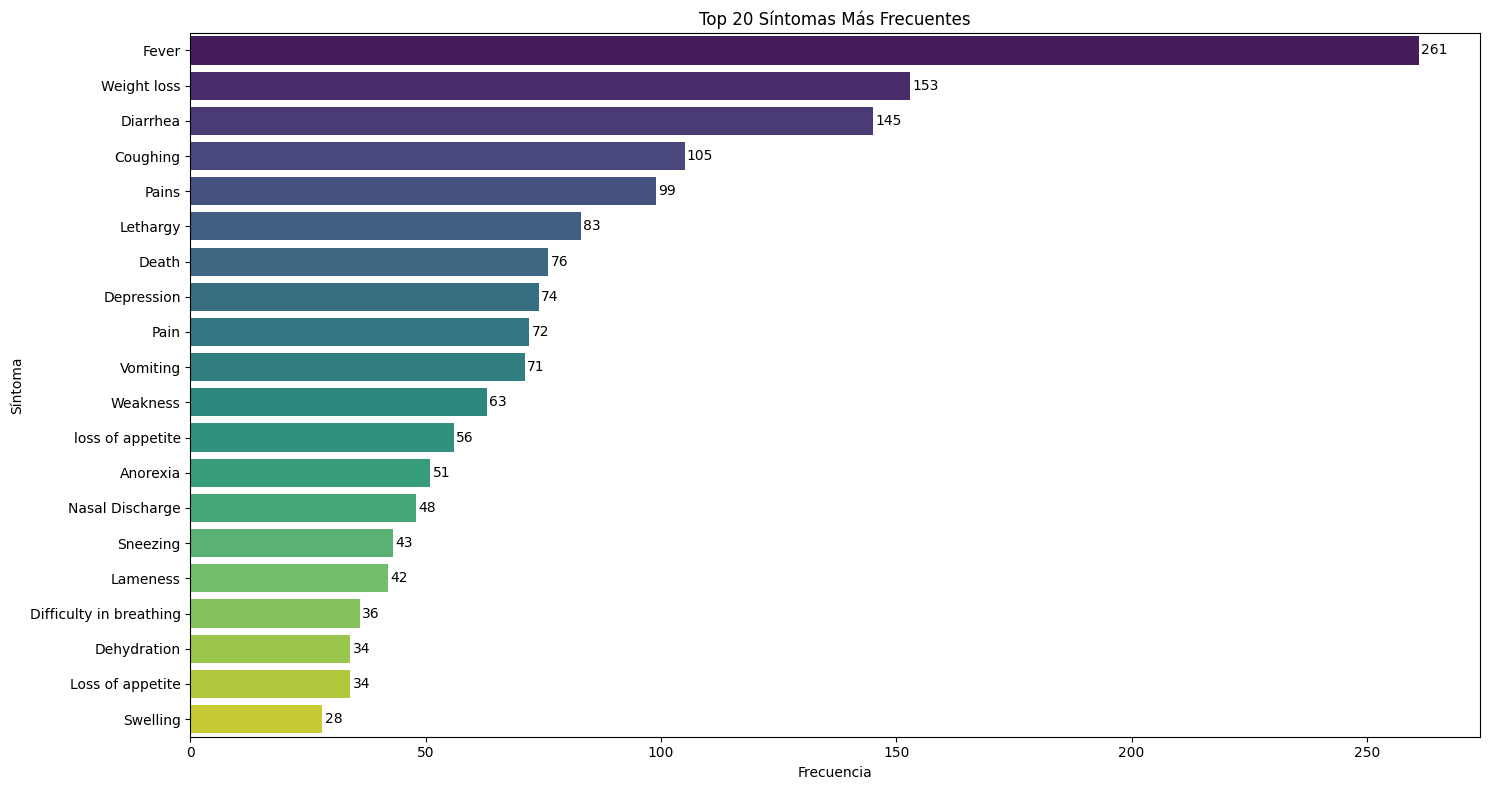

In [13]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=symptom_counts_top,
                 x='Frecuencia',
                 y='Síntoma',
                  hue='Síntoma',
                 palette='viridis',
                 dodge=False,
                 legend=False)

# Configuramos etiquetas y título del gráfico
ax.set(xlabel='Frecuencia', ylabel='Síntoma', title='Top 20 Síntomas Más Frecuentes')

# Agregamos etiquetas a las barras de forma manual (si plt.bar_label no funciona en tu versión)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y() + p.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### **¿Cuál es la especie que más sufre esos síntomas?** 🐃 🐑

Al igual que el anterior lo representamos con un gráfico de barras

Aquí destacaría que de la lista de síntomas frecuentes las convertimos en un DataFrame largo ya que así estos síntomas van asociados a su especie y filtramos para quedarnos solo con los del top y así agruparlos.

Esta gráfica les ayuda a los veterinarios a conocer que animales deben tenerlos bajo vigilancia, eso hace que su trabajo sea menos fragmentado en esta crisis virica.

Especies y cantidad de ocurrencias de síntomas del top:
  AnimalName  TopSíntomas
0  Buffaloes          274
1      Sheep          210
2        Pig          135
3       Fowl          110
4       Duck          108
5   Elephant           96
6     Monkey           89
7        Dog           76
8      Birds           68
9        cat           67


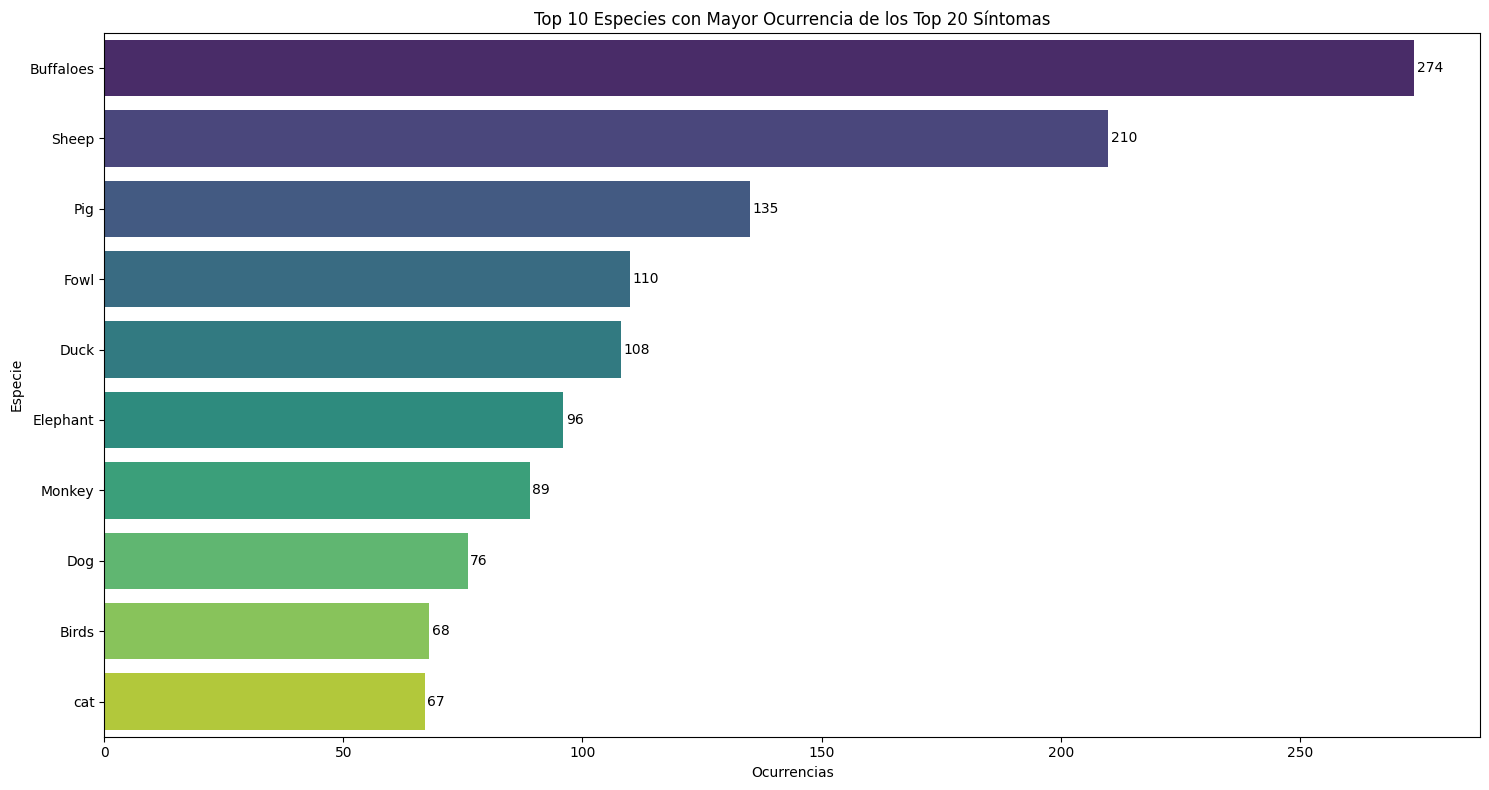

In [15]:
#  Obtenemos la lista de los síntomas más frecuentes
top_symptoms_list = symptom_counts_top['Síntoma'].tolist()

# Convertimos el DataFrame a formato largo para tener una fila por cada síntoma asociado a su especie
df_melt = df.melt(id_vars=['AnimalName'], value_vars=symptom_cols,
                  var_name='symptom_col', value_name='síntoma')

# Convertimos el DataFrame a formato largo para trabajar con las columnas de síntomas
df_melt = df.melt(id_vars=['AnimalName'], value_vars=symptom_cols,
                  var_name='symptom_col', value_name='síntoma')

# Limpiamos la columna 'síntoma': quitamos espacios y eliminamos nulos o cadenas vacías
df_melt['síntoma'] = df_melt['síntoma'].astype(str).str.strip()
df_melt = df_melt.dropna(subset=['síntoma'])
df_melt = df_melt[df_melt['síntoma'] != '']

# Filtramos para quedarnos solo con los síntomas que están en el top
top_symptoms_list = symptom_counts_top['Síntoma'].tolist()
df_top_symptoms = df_melt[df_melt['síntoma'].isin(top_symptoms_list)]

# Agrupamos por especie y contamos las ocurrencias de estos síntomas
species_top_symptom_counts = df_top_symptoms['AnimalName'].value_counts().reset_index()
species_top_symptom_counts.columns = ['AnimalName', 'TopSíntomas']

# Veamos los datos
print("Especies y cantidad de ocurrencias de síntomas del top:")
print(species_top_symptom_counts.head(10))

#  Graficamos el resultado en un histograma

plt.figure(figsize=(15,8))
ax = sns.barplot(data=species_top_symptom_counts.head(10),
                 x='TopSíntomas',
                 y='AnimalName',
                 hue='AnimalName',
                 palette='viridis',
                  dodge=False,
                 legend=False)

ax.set(xlabel='Ocurrencias', ylabel='Especie',
       title='Top 10 Especies con Mayor Ocurrencia de los Top 20 Síntomas')

# Agregamos etiquetas a cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y() + p.get_height()/2, f'{int(width)}',
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()




### ¿Cuáles son las especies que mas sufren el sintoma principal? 🦠
En este caso tener fiebre, parece ser un indicativo clave y que se repite con frecuencia en los casos sobretodo peligrosos, conocer este dato no solo refuerza la rapida ejecución, si no también conocer un top de especies puede permitir realizar mejores pruebas de diagnostico para así conseguir erradicar este virus.


Cantidad de registros con 'fever': 277
  AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     fever              diarrhea  vomiting  weight loss   
1        Dog     fever              diarrhea  coughing    tiredness   
2        Dog     fever              diarrhea  coughing     vomiting   
3        Dog     fever  difficulty breathing  coughing     lethargy   
4        Dog     fever              diarrhea  coughing     lethargy   

     symptoms5 Dangerous  Dangerous_numeric  
0  dehydration       Yes                  1  
1        pains       Yes                  1  
2     anorexia       Yes                  1  
3     sneezing       Yes                  1  
4     blue eye       Yes                  1  

Top 10 especies con casos de fever:
  AnimalName  CasesWithFever
0  Buffaloes              43
1      Sheep              38
2       Fowl              23
3        Pig              22
4   Elephant              19
5       Duck              19
6        Dog      

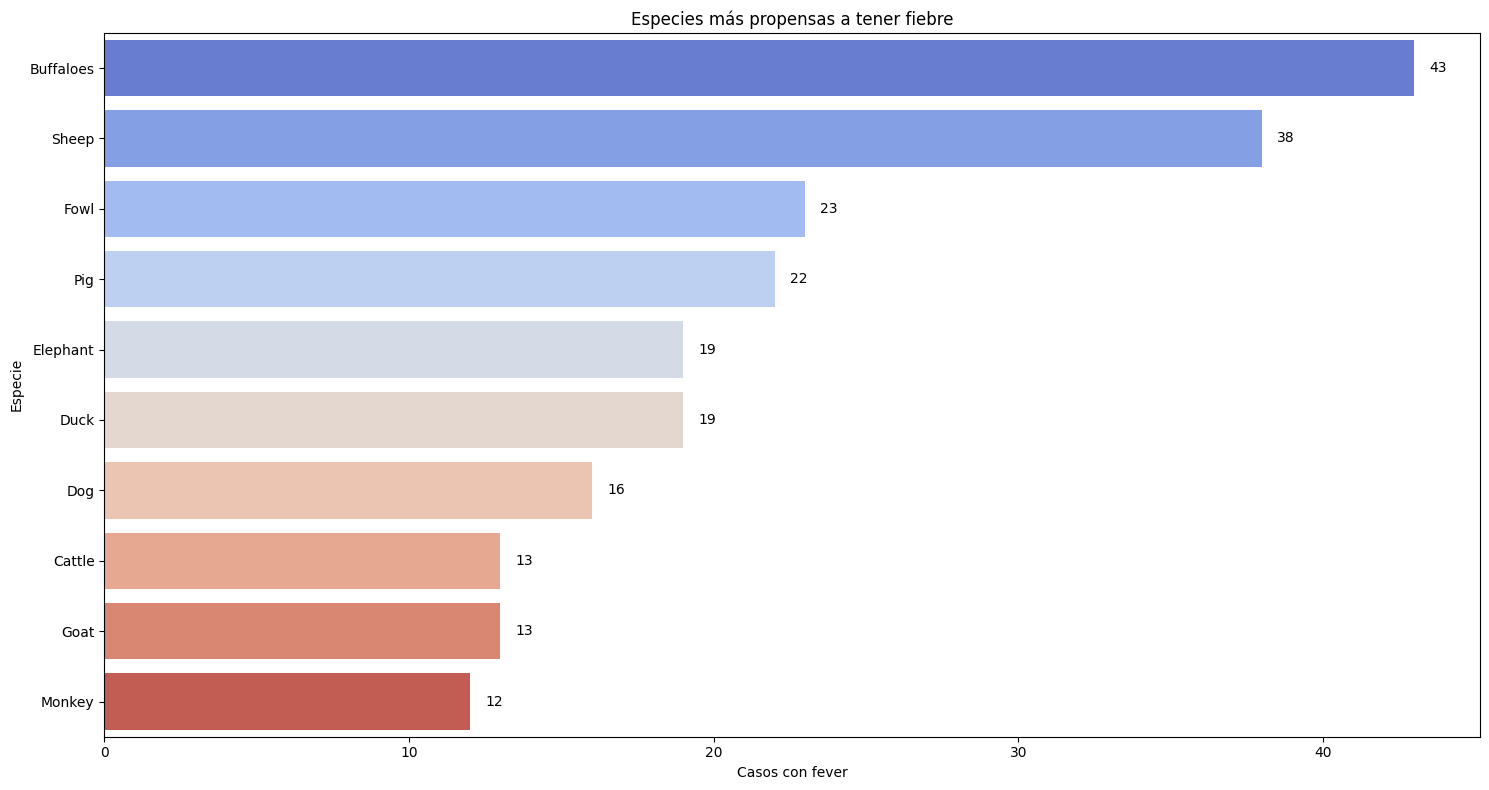

In [19]:
# Aseguramos que las columnas de síntomas estén en minúsculas y sin espacios adicionales
df[symptom_cols] = df[symptom_cols].apply(lambda col: col.map(lambda x: x.strip().lower() if isinstance(x, str) else x))

# Filtramos las filas que contienen "fever" en al menos una de las columnas de síntomas
fever_mask = df[symptom_cols].apply(lambda row: row.astype(str).str.contains("fever").any(), axis=1)
df_fever = df[fever_mask]

# Imprimimos la cantidad de registros encontrados para depuración
print("Cantidad de registros con 'fever':", len(df_fever))
print(df_fever.head())

if df_fever.empty:
    print("No se encontraron registros con 'fever'. Revisa el contenido de tus datos.")
else:
    # Agrupamos por especie y contamos la cantidad de casos que presentan fever
    species_fever_counts = df_fever['AnimalName'].value_counts().reset_index()
    species_fever_counts.columns = ['AnimalName', 'CasesWithFever']
    print("\nTop 10 especies con casos de fever:")
    print(species_fever_counts.head(10))

    # Visualizamos el resultado en un gráfico de barras horizontal
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data=species_fever_counts.head(10),
                     x='CasesWithFever',
                     y='AnimalName',
                     hue='AnimalName',
                     palette='coolwarm',
                     dodge=False,
                     legend=False)
    ax.set(xlabel='Casos con fever', ylabel='Especie', title='Especies más propensas a tener fiebre')

    # Añadimos etiquetas a cada barra
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5, p.get_y() + p.get_height()/2, f'{int(width)}',
                ha='left', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()



### ¿Cuáles son las especies que han falllecido debido a este virus? ☠
Para ello vamos a filtrar los datos que tengan la etiqueta death, y mostrarlo en en un gráfico sencillo de lineas horizontales, esto ayudará a los médicos veterinarios a conocer que especie tiene una baja resistencia y reforzar sus defenzas en un futuro brote.


Animales fallecidos por el virus:
  AnimalName  death_count
0      Sheep           24
1        Pig           20
2      Tiger           13
3     Donkey            7
4  Buffaloes            6
5     Monkey            5
6      Birds            1


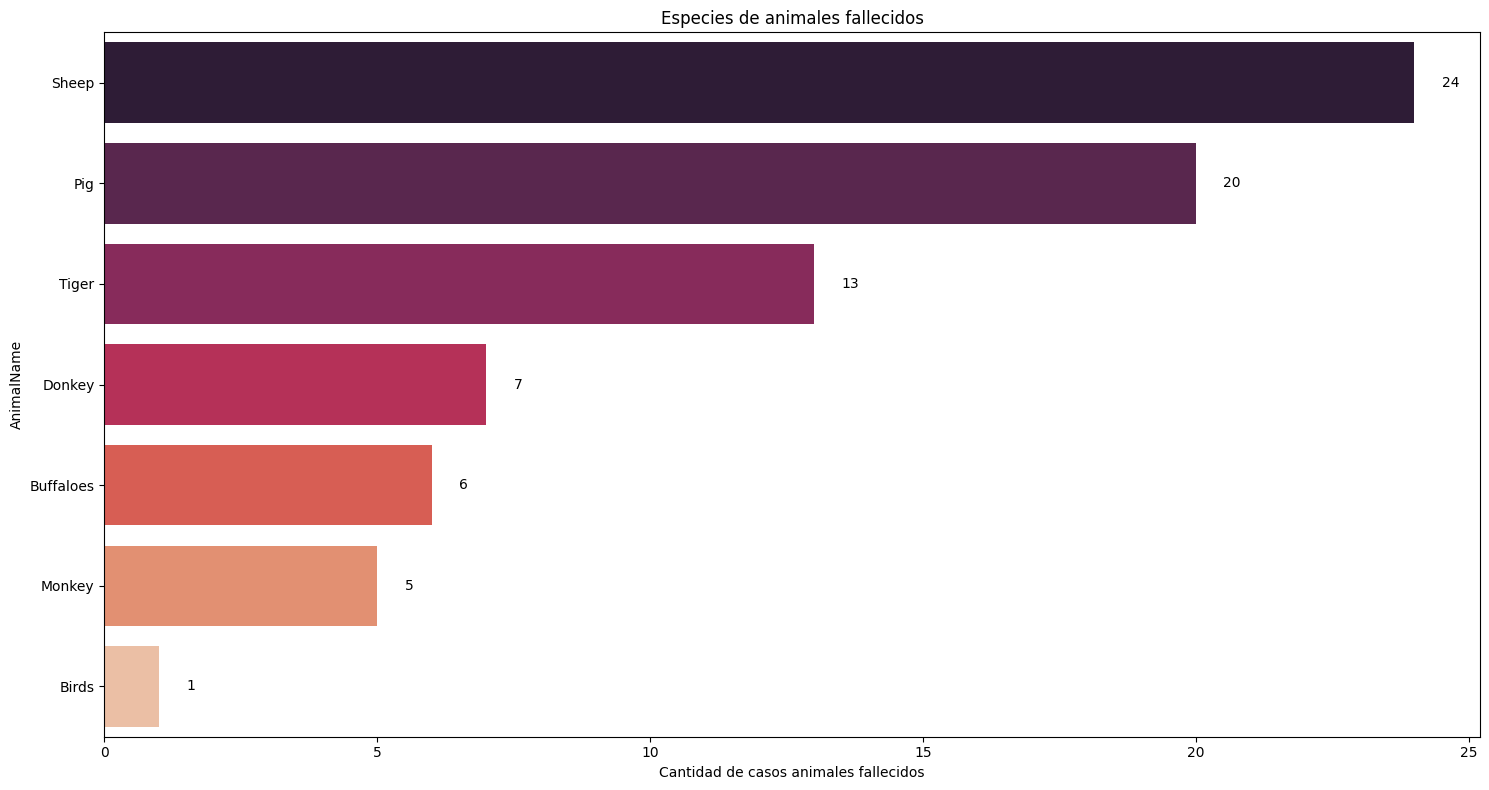

In [22]:
# Aseguramos que las columnas de síntomas estén en minúsculas y sin espacios extra
df[symptom_cols] = df[symptom_cols].apply(lambda col: col.map(lambda x: x.strip().lower() if isinstance(x, str) else x))


# Convertimos el DataFrame a formato largo, incluyendo la columna 'AnimalName'
df_melt = df.melt(id_vars=['AnimalName'], value_vars=symptom_cols,
                  var_name='symptom_col', value_name='symptom')

# Normalizamos la columna 'symptom': quitamos espacios y pasamos a minúsculas
df_melt['symptom'] = df_melt['symptom'].astype(str).str.strip().str.lower()
df_melt = df_melt[(df_melt['symptom'] != '') & (df_melt['symptom'].notna())]

# Filtramos las filas donde el síntoma es "death"
death_df = df_melt[df_melt['symptom'] == 'death']

# Agrupamos por especie (AnimalName) y contamos cuántos registros tienen la etiqueta "death"
death_counts = death_df['AnimalName'].value_counts().reset_index()
death_counts.columns = ['AnimalName', 'death_count']

print("Animales fallecidos por el virus:")
print(death_counts)

# Visualizamos el resultado en un gráfico de barras horizontal
plt.figure(figsize=(15,8))
ax = sns.barplot(data=death_counts, x='death_count', y='AnimalName', hue='AnimalName', palette='rocket', dodge=False, legend=False)
ax.set(xlabel='Cantidad de casos animales fallecidos', ylabel='AnimalName', title='Especies de animales fallecidos')

# Añadimos etiquetas a cada barra
for patch in ax.patches:
    width = patch.get_width()
    ax.text(width + 0.5, patch.get_y() + patch.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### ¿Cúales son el conjunto de síntomas presentados por animales fallecidos? 🦠 🦠
Esta gráfica es clave ya que nos da un patrón de cuales han sido los síntomas que han acompañado a esos animales que tenian la etiqueta "death", esto ayuda a determinar el protocolo de actuación ya que con esto se confirman cuales son la mayoria de los sintomas letales que ocaciona el virus, si se actua de una forma rápida la tasa de mortalidad se reducirá.

Co-síntomas que aparecen junto a 'death':
                   symptom  frequency
0                    pains         32
1           uteria inertia         21
2  fetopelvic dispropotion         21
3          malpresentation         20
4                    fever         14
5                 diarrhea         12
6              weight loss         10
7         loss of appetite          9
8                 coughing          8
9                 weakness          7


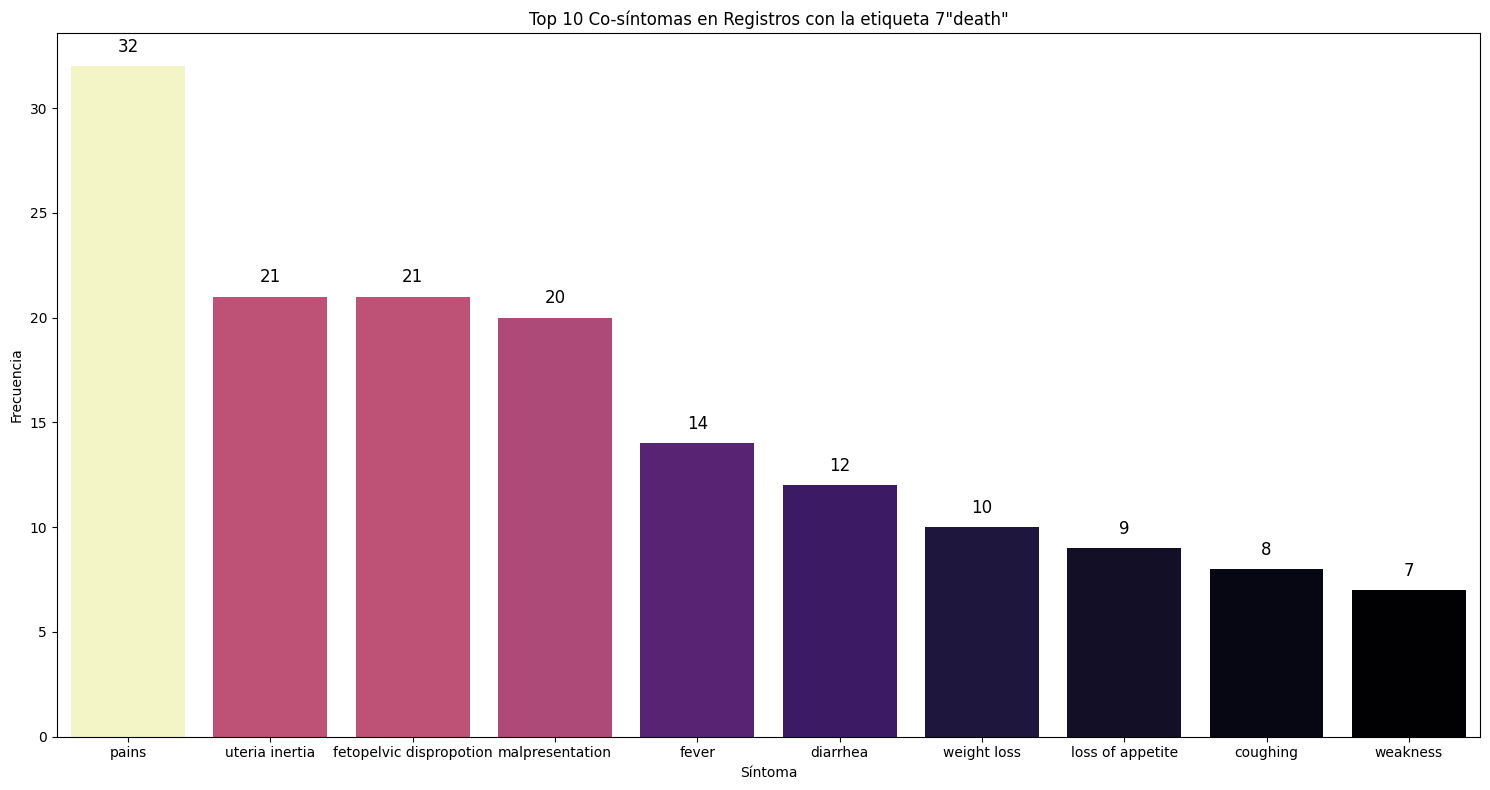

In [24]:
# 1. Normalizamos las columnas de síntomas: minúsculas y sin espacios extra
df[symptom_cols] = df[symptom_cols].apply(lambda col: col.map(lambda x: x.strip().lower() if isinstance(x, str) else x))

# 2. Filtramos las filas en las que al menos una columna de síntomas contiene "death"
mask_death = df[symptom_cols].apply(lambda row: row.astype(str).str.strip().str.lower().eq("death").any(), axis=1)
df_death = df[mask_death]

# 3. Convertimos estas filas a formato largo para tener una columna 'symptom'
df_death_melt = df_death.melt(id_vars=['AnimalName', 'Dangerous'], value_vars=symptom_cols,
                              var_name='symptom_col', value_name='symptom')

# Normalizamos nuevamente y eliminamos entradas vacías o nulas
df_death_melt['symptom'] = df_death_melt['symptom'].astype(str).str.strip().str.lower()
df_death_melt = df_death_melt[(df_death_melt['symptom'] != '') & (df_death_melt['symptom'].notna())]

# 4. Filtramos para eliminar la etiqueta "death" de los co-síntomas (ya que queremos ver los otros síntomas asociados)
df_co_symptoms = df_death_melt[df_death_melt['symptom'] != 'death']

# 5. Contamos la frecuencia de cada co-síntoma en estos registros
co_symptom_counts = df_co_symptoms['symptom'].value_counts().reset_index()
co_symptom_counts.columns = ['symptom', 'frequency']

print("Co-síntomas que aparecen junto a 'death':")
print(co_symptom_counts.head(10))

# 6. Visualizamos en un gráfico de barras vertical (histograma) el top 10 de co-síntomas
plt.figure(figsize=(15,8))
ax = sns.barplot(data=co_symptom_counts.head(10), x='symptom', y='frequency', hue='frequency', palette='magma', dodge=False, legend=False)
ax.set(xlabel='Síntoma', ylabel='Frecuencia',
       title='Top 10 Co-síntomas en Registros con la etiqueta 7"death"')

# Etiquetamos cada barra
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width()/2, height + 0.5, f'{int(height)}',
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Prueba de hipotesis 🔎


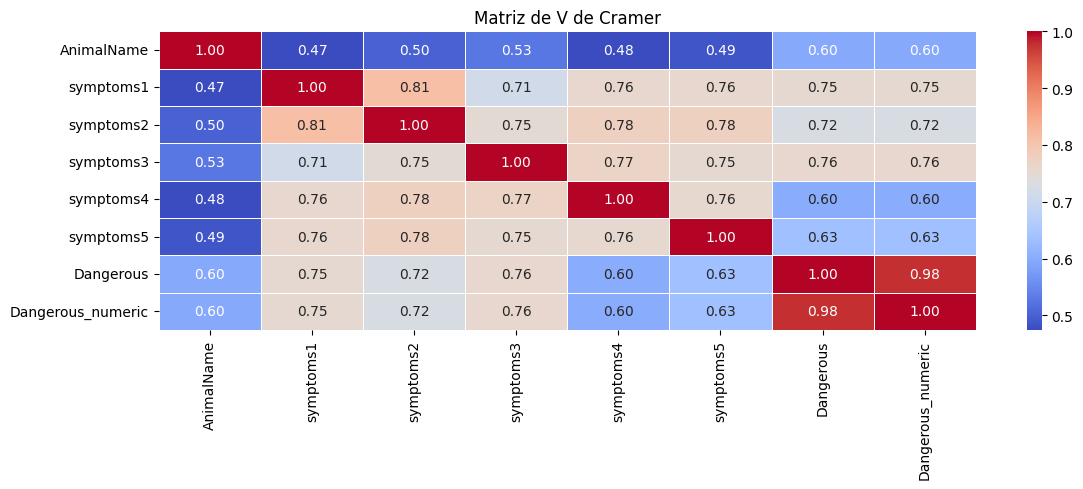

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Función para calcular la V de Cramer
def cramers_v(x, y):
    """Calcula la V de Cramer entre dos variables categóricas."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Seleccionar variables categóricas
categorical_columns = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous', 'Dangerous_numeric']
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calcular la V de Cramer para cada par de variables categóricas
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir valores a tipo numérico
cramers_v_matrix = cramers_v_matrix.astype(float)

# Graficar la matriz de V de Cramer
plt.figure(figsize=(12, 5))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de V de Cramer")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La matriz de V de Cramer mide la asociación entre variables categóricas. Vamos a interpretarla en relación con la hipótesis propuesta:

**Hallazgos clave:**

**Fuerte asociación entre síntomas y "Dangerous"**

Los valores de V de Cramer entre los síntomas (symptoms1 a symptoms5) y la variable Dangerous oscilan entre 0.61 y 0.78, lo que sugiere una relación moderada a fuerte.

Esto indica que ciertos síntomas tienen una influencia notable en la clasificación de los animales como en peligro.

**Correlaciones altas entre síntomas**

Los síntomas están altamente correlacionados entre sí (valores entre 0.74 y 0.82), lo que sugiere que los animales que presentan un síntoma tienden a mostrar otros también.

Esto podría indicar que la enfermedad progresa con un conjunto de síntomas específicos, lo que refuerza la idea de patrones sintomáticos asociados a la gravedad.

**Confirmación parcial de la hipótesis**

Dado que existe una relación significativa entre los síntomas y su peligrosidad, se respalda la hipótesis de que ciertos síntomas pueden predecir qué animales es mas probable que se encuentren en peligro.

Sin embargo, la alta correlación entre síntomas podría significar que un solo síntoma no es suficiente para hacer la clasificación, sino que se necesita un conjunto específico de síntomas.

# Conclusiones y próximos pasos 👣

Esperar el feedback de departamento clínico y conocer si estos resultados han sido realmente fructiferos para conseguir erradicar el virus y preservar la calidad de vida de los animales.

En caso de que se necesite profundizar más y análizar mas datos que pueden ayudar a una pronta detección del virus propongo:

* Hacer un análisis uno a unos de los 4 especies animales que más han fallecido a causa de de este virus, con la finalidad de poder perfilar aun más los síntomas que lo causan.

* Dado que una de los principales síntomas co-relacionado con "death" es **uteria inertia** seria interesante analizar los casos que a habido así como la especie en la que más predomina y si las hembras con esta afección tienen mayor riesgo mortal al contraer el virus.

* Seguir análizando los demas síntomas del top 20 y hacer diagrámas de relaciones.

* Realizar un modelo predictivo (como regresión logística o árbol de decisión) para identificar qué síntomas contribuyen más a la peligrosidad.

* Hacer un análisis de clusters para ver si hay combinaciones específicas de síntomas que se asocian con animales peligrosos.

* Aplicar pruebas estadísticas (como chi-cuadrado) para confirmar si la relación es significativa.

* En general, los datos sugieren que ciertos síntomas pueden ser utilizados para predecir la peligrosidad de los animales en el santuario.
